# FETAL HEALTH CLASSIFICATION

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1. Normal
2. Suspect
3. Pathological

In [166]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
%matplotlib inline

In [5]:
data = pd.read_csv('fetal_health.csv')

## Data summary

In [6]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
# data.info()

In [8]:
# data.describe()

### Cheking for null value

In [9]:
# print(data.isnull().sum())

### Data scaling

In [108]:
def scale(data): 
    min_max_scaler = MinMaxScaler()
    scaled_data =  min_max_scaler.fit_transform(data) 
    return scaled_data
    

In [145]:
drop_col = ['fetal_health', 'histogram_width', 'histogram_min', 'histogram_max',
            'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode','histogram_median', 
            'histogram_mean', 'histogram_variance', 'histogram_tendency'  ]
X = data.drop(drop_col, axis=1)
y = pd.DataFrame(data['fetal_health'])
y = y.astype('int')

predictions = {1: "Normal", 2 : "Suspect", 3: "Pathological"}


scaled_data = scale(X)
scaled_data = pd.DataFrame(scaled_data, columns = X.columns)
X
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,0.259259,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337
1,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128
2,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300
3,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649
4,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505
...,...,...,...,...,...,...,...,...,...,...,...
2121,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725,0.142012
2122,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758,0.140039
2123,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780,0.120316
2124,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703,0.138067


### Splitting data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training Models

In [89]:
classifier_dict = {
                   'OnevsRest':OneVsRestClassifier(SVC()), 
                   'MLP': MLPClassifier(), 
                   'KNN': KNeighborsClassifier(),
                   'Gaussian_process': GaussianProcessClassifier(),
                   'Decison_tree': DecisionTreeClassifier(),
                   'Random_forest': RandomForestClassifier(),
                   'ADA_boost': AdaBoostClassifier(),
                   'Gaussian_NB': GaussianNB(),
                   'Quadratic_Discriminant_Analysis': QuadraticDiscriminantAnalysis()
                  }

Training OnevsRest ........
              precision    recall  f1-score   support

      Normal       0.79      0.99      0.88       316
     Suspect       0.67      0.24      0.35        68
Pathological       0.80      0.10      0.17        42

    accuracy                           0.78       426
   macro avg       0.75      0.44      0.47       426
weighted avg       0.77      0.78      0.72       426

Accuracy of OnevsRest is 0.782
Training MLP ........


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

      Normal       0.84      0.96      0.89       316
     Suspect       0.69      0.53      0.60        68
Pathological       0.79      0.26      0.39        42

    accuracy                           0.82       426
   macro avg       0.77      0.58      0.63       426
weighted avg       0.81      0.82      0.80       426

Accuracy of MLP is 0.819
Training KNN ........


/home/hadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

      Normal       0.89      0.97      0.93       316
     Suspect       0.83      0.57      0.68        68
Pathological       0.81      0.69      0.74        42

    accuracy                           0.88       426
   macro avg       0.84      0.74      0.78       426
weighted avg       0.87      0.88      0.87       426

Accuracy of KNN is 0.878
Training Gaussian_process ........
              precision    recall  f1-score   support

      Normal       0.92      0.95      0.93       316
     Suspect       0.75      0.63      0.69        68
Pathological       0.73      0.76      0.74        42

    accuracy                           0.88       426
   macro avg       0.80      0.78      0.79       426
weighted avg       0.87      0.88      0.88       426

Accuracy of Gaussian_process is 0.878
Training Decison_tree ........
              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94       316


/home/hadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96       316
     Suspect       0.84      0.69      0.76        68
Pathological       0.95      0.90      0.93        42

    accuracy                           0.92       426
   macro avg       0.91      0.86      0.88       426
weighted avg       0.92      0.92      0.92       426

Accuracy of Random_forest is 0.925
Training ADA_boost ........


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

      Normal       0.90      0.95      0.92       316
     Suspect       0.72      0.60      0.66        68
Pathological       0.84      0.76      0.80        42

    accuracy                           0.87       426
   macro avg       0.82      0.77      0.79       426
weighted avg       0.87      0.87      0.87       426

Accuracy of ADA_boost is 0.873
Training Gaussian_NB ........
              precision    recall  f1-score   support

      Normal       0.95      0.88      0.91       316
     Suspect       0.53      0.82      0.65        68
Pathological       0.83      0.60      0.69        42

    accuracy                           0.84       426
   macro avg       0.77      0.77      0.75       426
weighted avg       0.87      0.84      0.85       426

Accuracy of Gaussian_NB is 0.84


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Quadratic_Discriminant_Analysis ........
              precision    recall  f1-score   support

      Normal       0.85      0.97      0.91       316
     Suspect       0.00      0.00      0.00        68
Pathological       0.55      0.83      0.66        42

    accuracy                           0.80       426
   macro avg       0.46      0.60      0.52       426
weighted avg       0.68      0.80      0.74       426

Accuracy of Quadratic_Discriminant_Analysis is 0.803


/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/hadi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


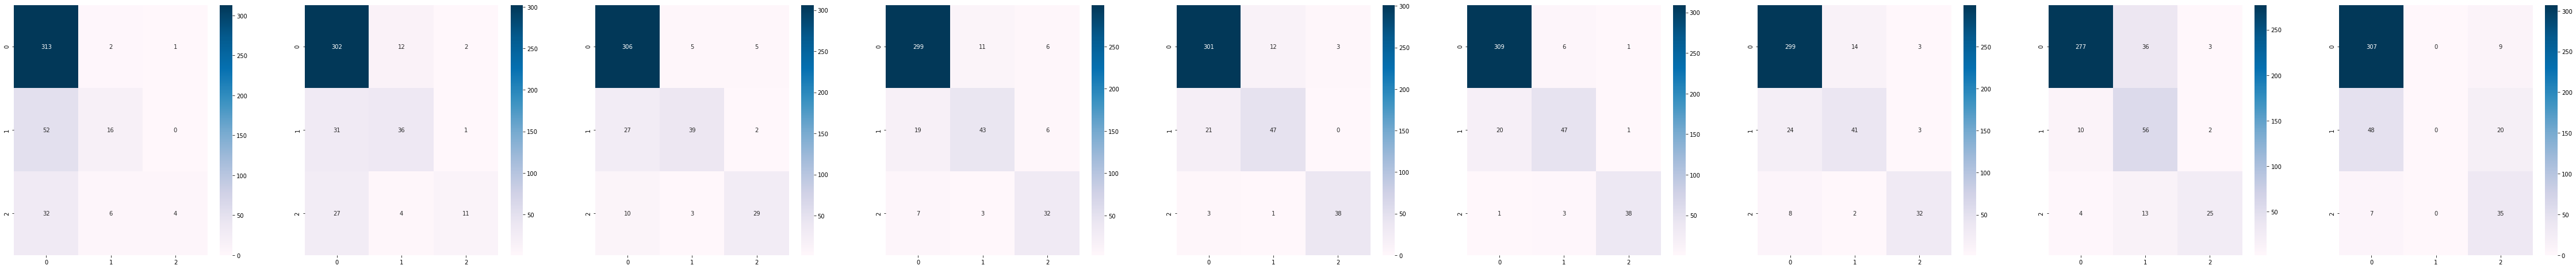

In [90]:
f = plt.figure(figsize=(80,8))
acc_list = []
    
for index, key in enumerate(classifier_dict):
    
    print(f'Training {key} ........')
    clf = classifier_dict[key].fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Classification report
    target_names = ['Normal', 'Suspect', 'Pathological']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    
    # Model Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {key} is {acc.round(3)}' ) 
    

    # Confusion matrix plot    
    f.add_subplot(1,9, index+1)
    con_mat = confusion_matrix(y_test, y_pred) 
    sns.heatmap(con_mat, annot=True, fmt='d', cmap='PuBu')
    
    acc_list.append(acc)
    

### Choosing the most accurate model

In [91]:
for index, value in enumerate(classifier_dict):
    if index == acc_list.index(max(acc_list)):
        print(f'{value} classifier has the maximum accuracy  = {max(acc_list).round(3)*100}%')
        model = classifier_dict[value].fit(X_train, y_train) 
    

Random_forest classifier has the maximum accuracy  = 92.5%


/home/hadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [162]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0


In [171]:
news = [[133.0, 0.003, 0.000,0.008,0.003,0.0,0.0,16.0, 2.1, 0.0, 13.4]]
news = pd.DataFrame(news, columns= X.columns)
news_scaled = scale(news)
news
news_scaled = pd.DataFrame(news_scaled, columns = X.columns)
news_scaled

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
pred = model.predict(news)[0]

predictions.keys()
output = ''

for value in predictions.keys():
    if value == pred:
        output = predictions[value]

In [173]:
probability = max(model.predict_proba(news)[0])
print(f'The Probaility of the fetus being {output} is {probability*100}%')

The Probaility of the fetus being Normal is 100.0%


### Saving the model

In [167]:
pickle.dump(clf, open('./classifier_model.pickle', 'wb'))